In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:21]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(400000, 20) (400000, 4)
[[ 3.985979    2.9266756  -1.4389254  ... -0.70710677  0.70710677
  -0.70710677]
 [-0.16229424 -2.2363117   0.46064845 ... -0.70710677  0.70710677
  -0.70710677]
 [-1.4659348   1.0638415  -1.7712959  ... -0.70710677  0.70710677
  -0.70710677]
 ...
 [-0.6823769   1.5280095  -0.04487954 ... -0.70710677  0.70710677
  -0.70710677]
 [ 0.9017219   0.17446594 -0.03713961 ... -0.70710677  0.70710677
  -0.70710677]
 [-0.7833187  -1.8923963   1.1181778  ... -0.70710677  0.70710677
  -0.70710677]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=640, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=320, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               13440     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               205120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1284      
Total params: 219,844
Trainable params: 219,844
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 1.4243 - accuracy: 0.5860 - val_loss: 2.4331 - val_accuracy: 0.0000e+00
Epoch 2/200
32/32 [==============================] - 0s 8ms/step - loss: 0.8951 - accuracy: 0.7557 - val_loss: 1.6403 - val_accuracy: 0.2999
Epoch 3/200
32/32 [==============================] - 0s 8ms/step - loss: 0.7073 - accuracy: 0.7932 - val_loss: 1.3904 - val_accuracy: 0.4381
Epoch 4/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6331 - accuracy: 0.8005 - val_loss: 1.2744 - val_accuracy: 0.4804
Epoch 5/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5959 - accuracy: 0.8021 - val_loss: 1.2481 - val_accuracy: 0.4870
Epoch 6/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5757 - accuracy: 0.8031 - val_loss: 1.2594 - val_accuracy: 0.4837
Epoch 7/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5646 - accuracy: 0.8036 - val_loss: 1.2651 - val_accuracy: 0.4801
Epoch 8/

Epoch 59/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5083 - accuracy: 0.8072 - val_loss: 1.2345 - val_accuracy: 0.5031
Epoch 60/200
32/32 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.8069 - val_loss: 1.2556 - val_accuracy: 0.4949
Epoch 61/200
32/32 [==============================] - 0s 7ms/step - loss: 0.5064 - accuracy: 0.8071 - val_loss: 1.1940 - val_accuracy: 0.5175
Epoch 62/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5064 - accuracy: 0.8075 - val_loss: 1.1736 - val_accuracy: 0.5232
Epoch 63/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5064 - accuracy: 0.8068 - val_loss: 1.2436 - val_accuracy: 0.4970
Epoch 64/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.8068 - val_loss: 1.2629 - val_accuracy: 0.4952
Epoch 65/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.8073 - val_loss: 1.1940 - val_accuracy: 0.5180
Epoch 

32/32 [==============================] - 0s 8ms/step - loss: 0.5005 - accuracy: 0.8067 - val_loss: 1.1617 - val_accuracy: 0.5318
Epoch 117/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4999 - accuracy: 0.8074 - val_loss: 1.1833 - val_accuracy: 0.5236
Epoch 118/200
32/32 [==============================] - 0s 7ms/step - loss: 0.5000 - accuracy: 0.8070 - val_loss: 1.1166 - val_accuracy: 0.5464
Epoch 119/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4997 - accuracy: 0.8071 - val_loss: 1.1300 - val_accuracy: 0.5419
Epoch 120/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.8068 - val_loss: 1.1612 - val_accuracy: 0.5302
Epoch 121/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4989 - accuracy: 0.8080 - val_loss: 1.1856 - val_accuracy: 0.5258
Epoch 122/200
32/32 [==============================] - 0s 8ms/step - loss: 0.5006 - accuracy: 0.8070 - val_loss: 1.1988 - val_accuracy: 0.5204
Epoch 123/200

32/32 [==============================] - 0s 8ms/step - loss: 0.4974 - accuracy: 0.8066 - val_loss: 1.1188 - val_accuracy: 0.5475
Epoch 174/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4979 - accuracy: 0.8068 - val_loss: 1.0886 - val_accuracy: 0.5576
Epoch 175/200
32/32 [==============================] - 0s 7ms/step - loss: 0.4963 - accuracy: 0.8079 - val_loss: 1.1573 - val_accuracy: 0.5357
Epoch 176/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.8073 - val_loss: 1.1333 - val_accuracy: 0.5422
Epoch 177/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8077 - val_loss: 1.3168 - val_accuracy: 0.4836
Epoch 178/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4953 - accuracy: 0.8079 - val_loss: 1.2582 - val_accuracy: 0.5020
Epoch 179/200
32/32 [==============================] - 0s 8ms/step - loss: 0.4961 - accuracy: 0.8074 - val_loss: 1.1098 - val_accuracy: 0.5483
Epoch 180/200

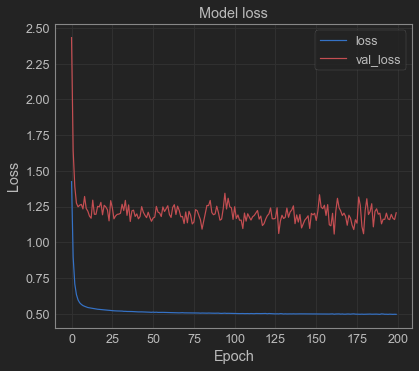

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

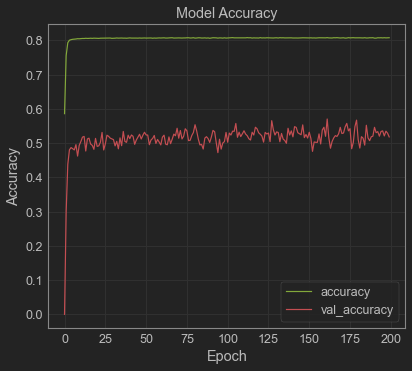

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:21]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(80000, 20) (80000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

2500/2500 [==============================] - 5s 2ms/step - loss: 0.6266 - accuracy: 0.7527
loss:  0.6265731453895569
accuracy 0.7526875138282776


In [14]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
# for p, y in zip(pred, y_test_bit.flatten()):
 #   print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [15]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 19785
Error Count: 21679


In [16]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.067746875
